# 1. Introduction

This dataset contains anonymized credit card transaction records, where the goal is to detect fraudulent transactions. 
The dataset is extremely imbalanced, with fraud cases being very rare, making this a realistic anomaly detection and classification problem.
This notebook performs exploratory analysis to understand the data structure and the characteristics of fraudulent vs non-fraudulent transactions.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# 2. Load Data

In [27]:
df = pd.read_csv('../data/creditcard.csv')
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102455,68211.0,-5.360930,-4.185790,0.058931,2.570011,-1.555679,0.098112,0.558320,0.817653,0.222804,-1.193316,-1.662631,0.095034,-0.322793,0.382032,0.220850,0.177888,0.477652,0.388906,0.856538,1.024404,0.134379,-0.757172,-0.482800,0.121646,0.293400,-0.356483,0.289373,-0.756839,617.32,0
121850,76343.0,-1.139881,1.985957,-0.066337,1.117145,-0.231786,-1.166888,0.085554,0.712801,-0.794607,-0.916634,-0.449419,-0.287657,-0.349259,-0.439903,1.141698,0.375893,1.265790,0.844411,0.186381,-0.099281,0.124119,0.215304,-0.103368,0.261471,-0.179417,-0.323396,0.057083,0.112219,1.00,0
176015,122596.0,-0.165843,-0.056974,0.605647,-2.311774,-0.424274,-0.205680,-0.327662,-0.723638,-0.605795,0.180427,0.163846,-0.323542,-0.320328,-0.318110,-1.394500,1.656185,-0.517656,-0.394406,0.083621,-0.277543,1.268529,1.207396,0.055236,-0.326783,-1.104724,-0.373817,0.314814,0.243390,29.95,0
263270,160869.0,-0.301928,0.381283,1.676243,0.077955,-0.109638,-0.134400,0.898841,-0.287541,0.139018,-0.589210,-0.554790,0.658672,1.350478,-0.494839,0.843341,-0.463695,-0.317658,-0.130049,0.871657,0.378063,-0.066182,-0.007047,0.169881,-0.017738,-0.572943,-0.502163,0.019011,-0.035339,100.00,0
197926,132239.0,2.166698,-0.368219,-1.879960,-2.243860,0.263524,-1.126156,0.259395,-0.412060,1.767299,-1.286914,-0.515755,1.553628,1.475161,0.225400,1.268559,-1.080922,-0.328727,-0.472330,1.291170,-0.095162,-0.231799,-0.402712,0.210509,0.282994,0.142150,-1.111624,0.035467,-0.043996,4.71,0
24220,33124.0,1.119939,0.534285,0.756047,2.525117,-0.188040,-0.314723,0.081530,0.025408,-0.695090,0.653169,-0.116261,-0.231207,-0.746041,0.498933,0.755422,0.317909,-0.165351,-0.940155,-1.388156,-0.237016,-0.151428,-0.500965,0.164135,0.336208,0.211443,-0.175525,-0.000195,0.023825,5.99,0
222081,142811.0,1.770190,0.126878,-0.211411,3.910886,0.202859,1.031399,-0.328241,0.257418,-0.458676,1.385613,-0.006590,0.951293,0.213729,-0.334179,-2.900925,0.493316,-0.594779,-0.035014,-0.923590,-0.182040,0.142627,0.602677,0.068658,0.787639,0.087737,0.077220,-0.009434,-0.041297,39.80,0
253878,156473.0,0.025696,0.792030,0.226266,-0.605111,0.484998,-1.078855,0.951706,-0.172365,0.027779,-0.394975,-1.124771,-0.112500,-0.347992,0.181944,-0.348693,-0.033299,-0.439366,-0.652049,-0.025214,-0.048786,-0.271518,-0.632603,0.062874,-0.127921,-0.480984,0.148761,0.243140,0.095902,2.58,0
89216,62476.0,1.121527,0.208353,0.202133,1.138648,0.068794,-0.158828,0.176503,-0.105339,-0.145071,-0.029333,-0.353418,0.652271,1.060418,0.152804,1.115208,-0.076935,-0.379093,-0.509882,-0.719945,0.000990,0.115269,0.354326,-0.179000,-0.240712,0.663680,-0.237553,0.031241,0.025737,53.64,0
63207,50608.0,-0.988271,-0.932178,1.717482,-1.694737,0.957518,-1.149287,0.649517,-1.029868,-0.496942,1.378923,1.279774,-0.699431,-0.886330,-1.008226,-1.349536,0.656160,-0.342230,-1.197104,0.470288,-0.027668,0.010248,0.694859,-0.621559,0.373755,0.377671,-0.382606,-1.066374,-0.700201,18.00,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [14]:
# drop duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()   

In [16]:
# basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [17]:
# data quality report
def data_quality_report(dataframe):
    report = pd.DataFrame()
    report['Data Type'] = dataframe.dtypes
    report['Non-Null Count'] = dataframe.notnull().sum()
    report['Null Count'] = dataframe.isnull().sum()
    report['Unique Values'] = dataframe.nunique()
    report['Mean'] = dataframe.mean(numeric_only=True)
    report['Median'] = dataframe.median(numeric_only=True)
    report['Min'] = dataframe.min(numeric_only=True)
    report['Max'] = dataframe.max(numeric_only=True)
    report['Std Dev'] = dataframe.std(numeric_only=True)
    return report

dq_report = data_quality_report(df)

In [18]:
dq_report

,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Min,Max,Std Dev
Time,float64,283726,0,124592,94811.077600,84692.500000,0.000000,172792.000000,47481.047891
V1,float64,283726,0,275663,0.005917,0.020384,-56.407510,2.454930,1.948026
V2,float64,283726,0,275663,-0.004135,0.063949,-72.715728,22.057729,1.646703
V3,float64,283726,0,275663,0.001613,0.179963,-48.325589,9.382558,1.508682
V4,float64,283726,0,275663,-0.002966,-0.022248,-5.683171,16.875344,1.414184
V5,float64,283726,0,275663,0.001828,-0.053468,-113.743307,34.801666,1.377008
V6,float64,283726,0,275663,-0.001139,-0.275168,-26.160506,73.301626,1.331931
V7,float64,283726,0,275663,0.001801,0.040859,-43.557242,120.589494,1.227664
V8,float64,283726,0,275663,-0.000854,0.021898,-73.216718,20.007208,1.179054
V9,float64,283726,0,275663,-0.001596,-0.052596,-13.434066,15.594995,1.095492


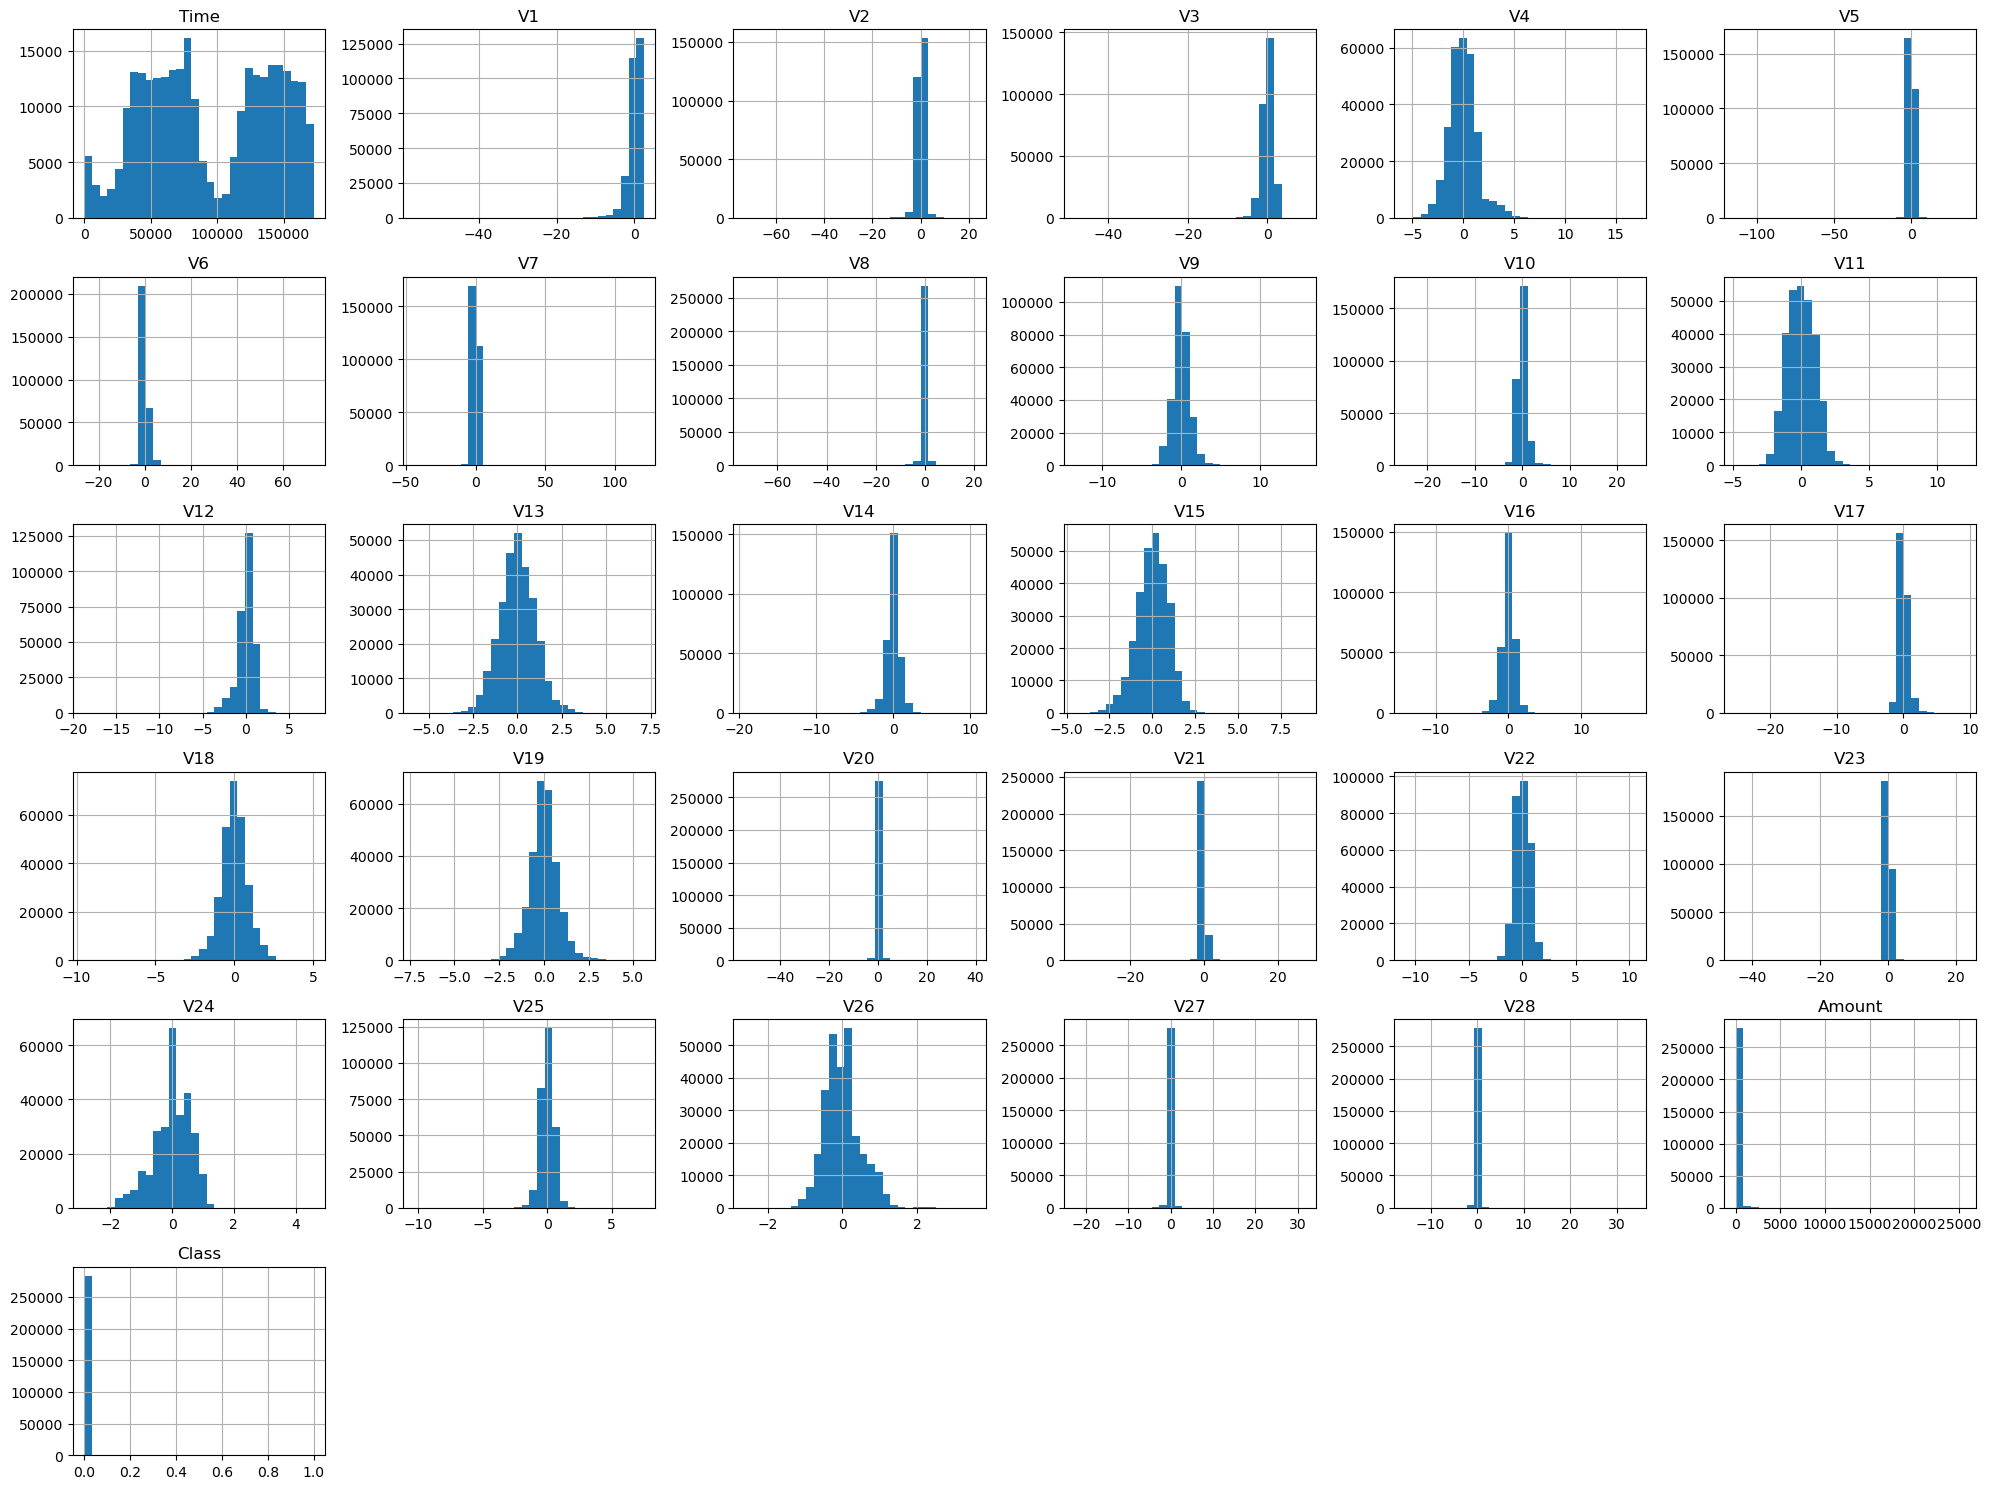

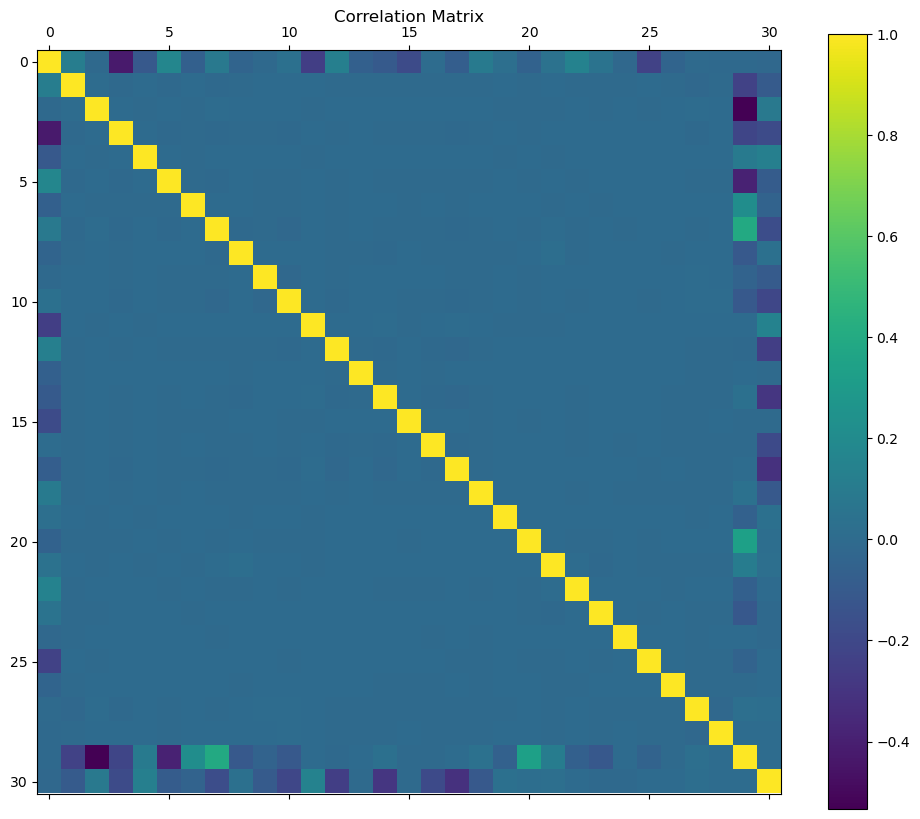

In [24]:
# data distribution
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

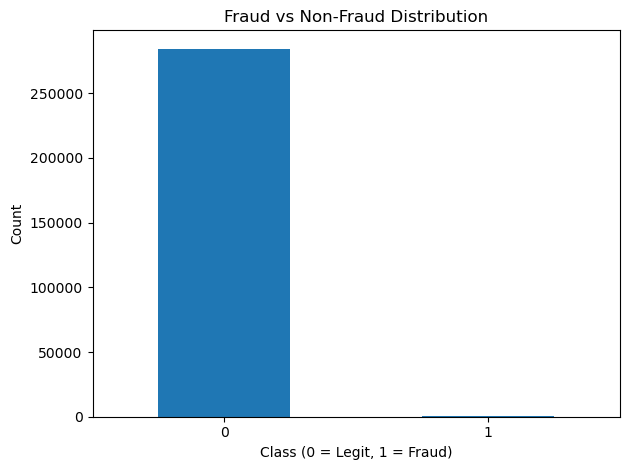

In [31]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../visuals/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



### Initial Observations
- Fraud cases make up a very small portion of transactions.
- Standard accuracy will be misleading because predicting "no fraud" most of the time will still appear accurate.
- Model evaluation must focus on Precision, Recall, and F1-score instead of Accuracy.


In [32]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

C:\Users\lenovo i3\AppData\Local\Temp\ipykernel_12208\1250443683.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=fraud[col], label='Fraud', shade=True)
C:\Users\lenovo i3\AppData\Local\Temp\ipykernel_12208\1250443683.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=legit[col], label='Legit', shade=True)
C:\Users\lenovo i3\AppData\Local\Temp\ipykernel_12208\1250443683.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=fraud[col], label='Fraud', shade=True)
C:\Users\lenovo i3\AppData\Local\Temp\ipykernel_12208\1250443683.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.

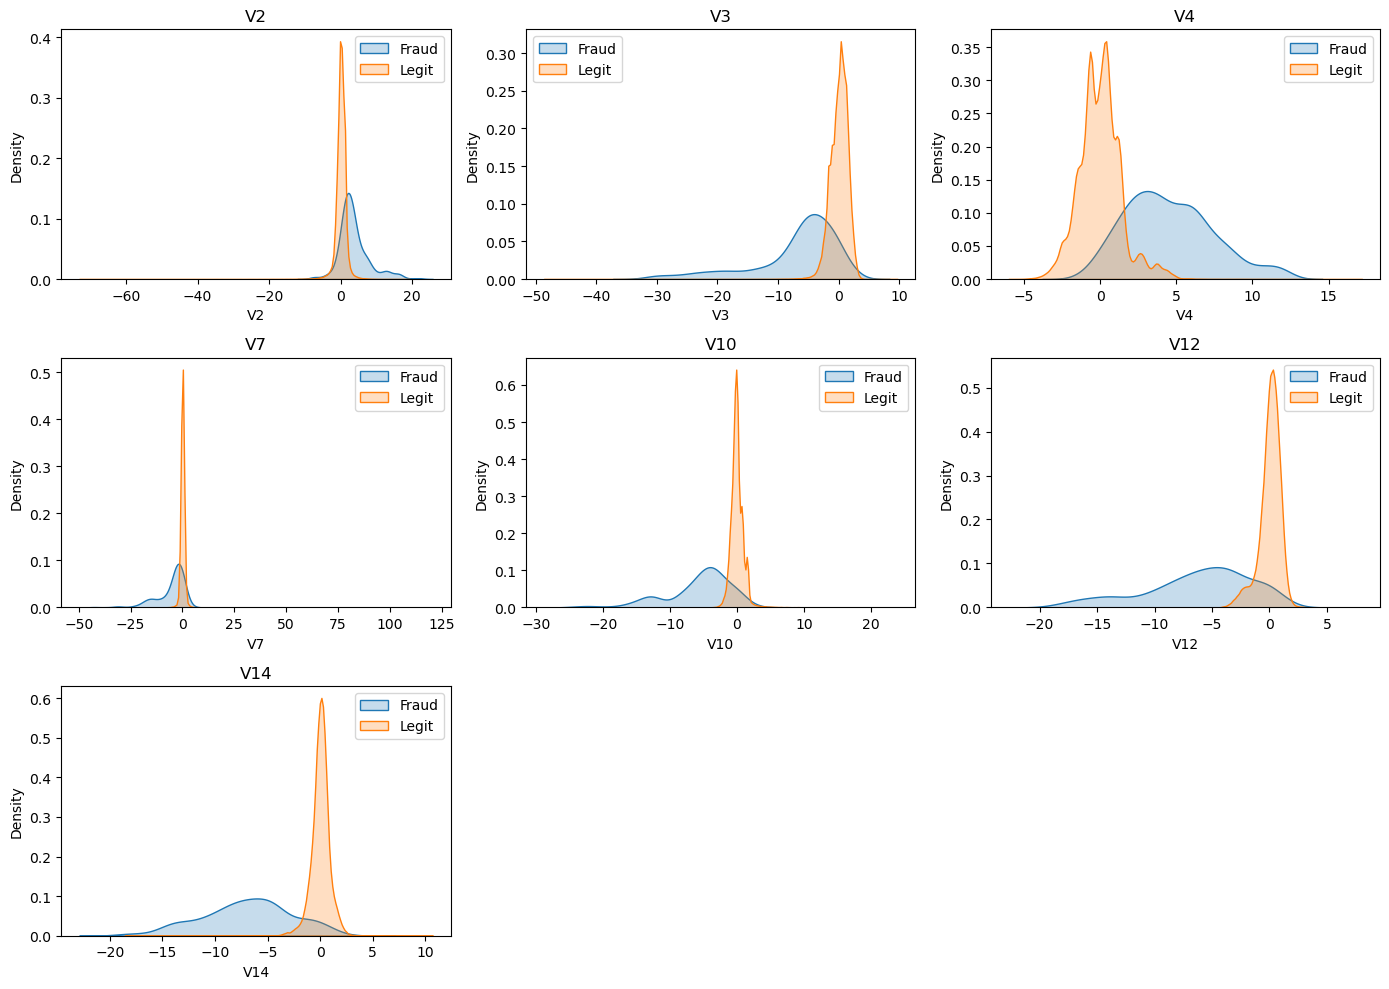

In [34]:
features = ['V2', 'V3', 'V4', 'V7', 'V10', 'V12', 'V14']  # Known strong fraud indicators

plt.figure(figsize=(14,10))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.kdeplot(x=fraud[col], label='Fraud', shade=True)
    sns.kdeplot(x=legit[col], label='Legit', shade=True)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.savefig('../visuals/fraud_vs_legit_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


### Feature Behavior Insights
Certain features (V2, V3, V4, V10, V12, and V14) show significantly different distributions between fraudulent and legitimate transactions. 
This indicates these features are useful predictors for fraud detection. 
This step helps guide feature selection and model training, focusing on high-signal variables rather than treating all features equally.
